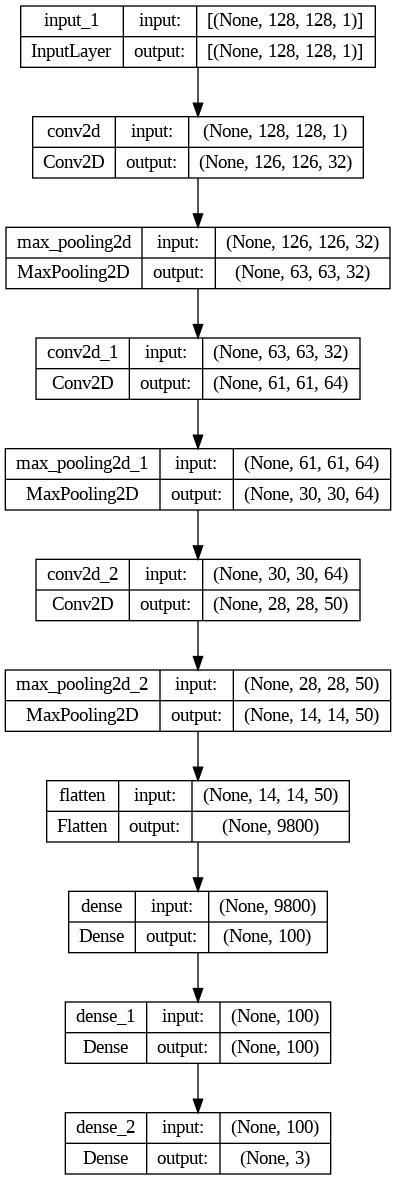

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models

# Define the model architecture
SIZE = 128  # Example size, can be adjusted
glcmcnn = models.Sequential([
    layers.InputLayer(input_shape=[SIZE, SIZE, 1]),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

# Save the model architecture as an image
plot_model(glcmcnn, to_file='glcmcnn_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
with open('/content/drive/MyDrive/Projects/RM/final_notebook_DONT-RUN/GLCM-CNN/X_train.pkl', 'rb') as file:
  X_train = pickle.load(file)
with open('/content/drive/MyDrive/Projects/RM/final_notebook_DONT-RUN/GLCM-CNN/X_test.pkl', 'rb') as file:
  X_test = pickle.load(file)
with open('/content/drive/MyDrive/Projects/RM/final_notebook_DONT-RUN/GLCM-CNN/X_val.pkl', 'rb') as file:
  X_val = pickle.load(file)

In [ ]:
with open('/content/drive/MyDrive/Projects/RM/final_notebook_DONT-RUN/GLCM-CNN/label_map.pkl', 'rb') as file:
  label_map = pickle.load(file)
with open('/content/drive/MyDrive/Projects/RM/final_notebook_DONT-RUN/GLCM-CNN/y_train.pkl', 'rb') as file:
  y_train = pickle.load(file)
with open('/content/drive/MyDrive/Projects/RM/final_notebook_DONT-RUN/GLCM-CNN/y_test.pkl', 'rb') as file:
  y_test = pickle.load(file)
with open('/content/drive/MyDrive/Projects/RM/final_notebook_DONT-RUN/GLCM-CNN/y_val.pkl', 'rb') as file:
  y_val = pickle.load(file)

In [ ]:
X_train.shape

(1322, 25)

In [ ]:
SIZE = 128
def resize_input(np_image_features):
  np_image_features = np.array(np_image_features)
  Images = []
  for j in range(len(np_image_features)):
      my_image  = np_image_features[j].reshape(5,5)
      Image_feature = np.resize(my_image,(SIZE,SIZE))
      Images.append(Image_feature)

  return np.array(Images)

In [ ]:
X_train = resize_input(X_train)
X_train = np.reshape(X_train, (1322, SIZE, SIZE, 1))
X_train.shape

(1322, 128, 128, 1)

In [ ]:
X_val = resize_input(X_val)
X_val = np.reshape(X_val, (60, SIZE, SIZE, 1))
X_val.shape

(60, 128, 128, 1)

In [ ]:
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded format
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)
y_val_categorical = to_categorical(y_val, num_classes=3)

In [ ]:
from tensorflow.keras import layers, models
glcmcnn = tf.keras.models.Sequential([layers.InputLayer(input_shape=[SIZE,SIZE, 1]),

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(100, activation='relu'),

    layers.Dense(3, activation='softmax'),])

In [ ]:
glcmcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
glcmcnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 50)        28850     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 50)       

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, restore_best_weights=True)
history = glcmcnn.fit(
    x = X_train,
    y=y_train_categorical,
    validation_data = (X_val, y_val_categorical),
    batch_size=32,
    epochs=50,
    callbacks=early_stopping
  )

Epoch 1/50
42/42 [==============================] - 25s 572ms/step - loss: 16.2865 - accuracy: 0.3396 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/50
42/42 [==============================] - 21s 495ms/step - loss: 1.1069 - accuracy: 0.3290 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/50
42/42 [==============================] - 23s 546ms/step - loss: 1.0987 - accuracy: 0.3457 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 4/50
42/42 [==============================] - 21s 506ms/step - loss: 1.0983 - accuracy: 0.3464 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 5/50
42/42 [==============================] - 20s 481ms/step - loss: 1.0985 - accuracy: 0.3464 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 6/50
42/42 [==============================] - 21s 513ms/step - loss: 1.0984 - accuracy: 0.3464 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 7/50
42/42 [==============================] - 21s 501ms/step - loss: 1.0983 - accuracy: 0.3464 - val_loss: 1.0989 - val_accuracy: 0.333

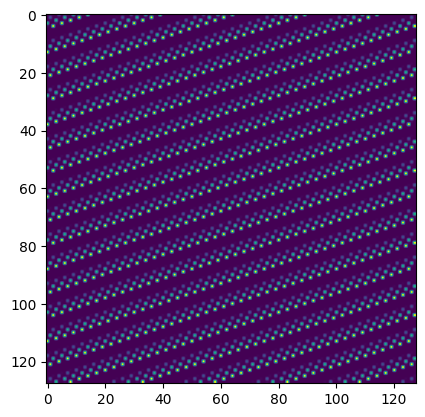

In [ ]:
import random
import matplotlib.pyplot as plt
n=random.randint(0, X_val.shape[0]-1) #Select the index of image to be loaded for testing
img = X_val[n]
plt.imshow(img)

In [ ]:
y_pred = glcmcnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix